In [1]:
import sys
#sys.path.append('/home/yungdankblast/Desktop/Research/delay-optimizer')
sys.path.append('/home/cayjobla/Desktop/Research/delay-optimizer')
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from Optimizer_Scripts.DelayTypeGenerators import *
from Optimizer_Scripts.Data import Data

# <center> Path Plots

### Helper Functions

In [2]:
def load(loss_name, d, file_tag):
    filename = f"Data/{loss_name}{d}d_{file_tag}.dat"
    return Data.load(filename)

In [3]:
def plot_paths(loss_name, dim, file_tag, ax=None):
    # Initialize
    if ax is None: fig, ax = plt.subplots(1, 1, dpi=100)
    data = load(loss_name, dim, file_tag)
    
    for p in range(len(data.state_vals)):
        x, y = np.array(data.state_vals[p]).T
        ax.scatter(x, y, c=np.arange(len(x)), 
                   norm=mpl.colors.Normalize(0, data.maxiter), 
                   cmap='winter_r', alpha=1/255)
        
        ax.set_title(f"{loss_name} {dim}d", fontsize=25, pad=16)
        ax.set_xlim(data.domain)
        ax.set_ylim(data.domain)
        ax.tick_params(labelsize=16)


def plot_paths_all(loss_name, file_tags, labels=None, axes=None):
    # Initialize
    dimensions = [2, 10, 100, 1000]
    if axes is None:
        fig, axes = plt.subplots(len(file_tags), 4, figsize=(30, 15), dpi=300)
    if labels is None: labels = file_tags
    
    for i, tag in enumerate(file_tags):
        for j, d in enumerate(dimensions):
            ax = axes[i,j]
            plot_paths(loss_name, d, tag, ax=ax)
            ax.set_ylabel(labels[i], fontsize=25)
            
    plt.gcf().suptitle(f"Optimization Paths on the {loss_name} function", fontsize=40)
    
    return axes
    
    
def plot_finals(loss_name, dim, file_tag, ax=None):
    # Initialize
    if ax is None: fig, ax = plt.subplots(1, 1, dpi=100)
    data = load(loss_name, dim, file_tag)
    x, y = data.get_finals(data.state_vals).T
    
    ax.scatter(x, y, c='r')
        
    ax.set_title(f"{loss_name} {dim}d", fontsize=25, pad=16)
    ax.set_xlim(data.domain)
    ax.set_ylim(data.domain)
    ax.tick_params(labelsize=16)
    
    
def plot_finals_all(loss_name, file_tags, labels=None, axes=None):
    # Initialize
    dimensions = [2, 10, 100, 1000]
    if axes is None:
        fig, axes = plt.subplots(len(file_tags), 4, figsize=(30, 15), dpi=300)
    if labels is None: labels = file_tags
    
    # Plot Undelayed
    for i, tag in enumerate(file_tags):
        for j, d in enumerate(dimensions):
            ax = axes[i,j]
            plot_finals(loss_name, d, tag, ax)
            ax.set_ylabel(labels[i], fontsize=25)
        
    plt.gcf().suptitle(f"Optimization Finals on the {loss_name} function", fontsize=40)
    
    return axes

def plot_conv(loss_name, dim, file_tag, ax=None):
    # Initialize
    if ax is None: fig, ax = plt.subplots(1, 1, dpi=100)
    data = load(loss_name, dim, file_tag)
    
    # Plot initials
    x, y = data.get_x_inits().T
    ax.scatter(x, y, c='lime')
    
    # Plot finals
    x, y = data.get_finals(data.state_vals).T
    ax.scatter(x, y, c='navy')
        
    ax.set_xlim(data.domain)
    ax.set_ylim(data.domain)
    ax.tick_params(labelsize=16)
    

def plot_conv_all(loss_name, file_tags, labels=None, axes=None):
    # Initialize
    dimensions = [2, 10, 100, 1000]
    if axes is None:
        fig, axes = plt.subplots(len(file_tags), 4, figsize=(30, 15), dpi=300)
    if labels is None: labels = file_tags
    
    # Plot Undelayed
    for i, tag in enumerate(file_tags):
        for j, d in enumerate(dimensions):
            ax = axes[i,j]
            plot_conv(loss_name, d, tag, ax)
            
            axes[0,j].set_title(f"{loss_name} {d}d", fontsize=25, pad=16)
        axes[i,0].set_ylabel(labels[i], fontsize=25)
        
    plt.gcf().suptitle(f"Convergence on the {loss_name} function", fontsize=40)
    
    return axes

## Ackley

In [5]:
loss_name = "Ackley"
file_tags = ["optimal_undel", "optimal_stochL1"]
labels = ["Undelayed", "Stochastic"]

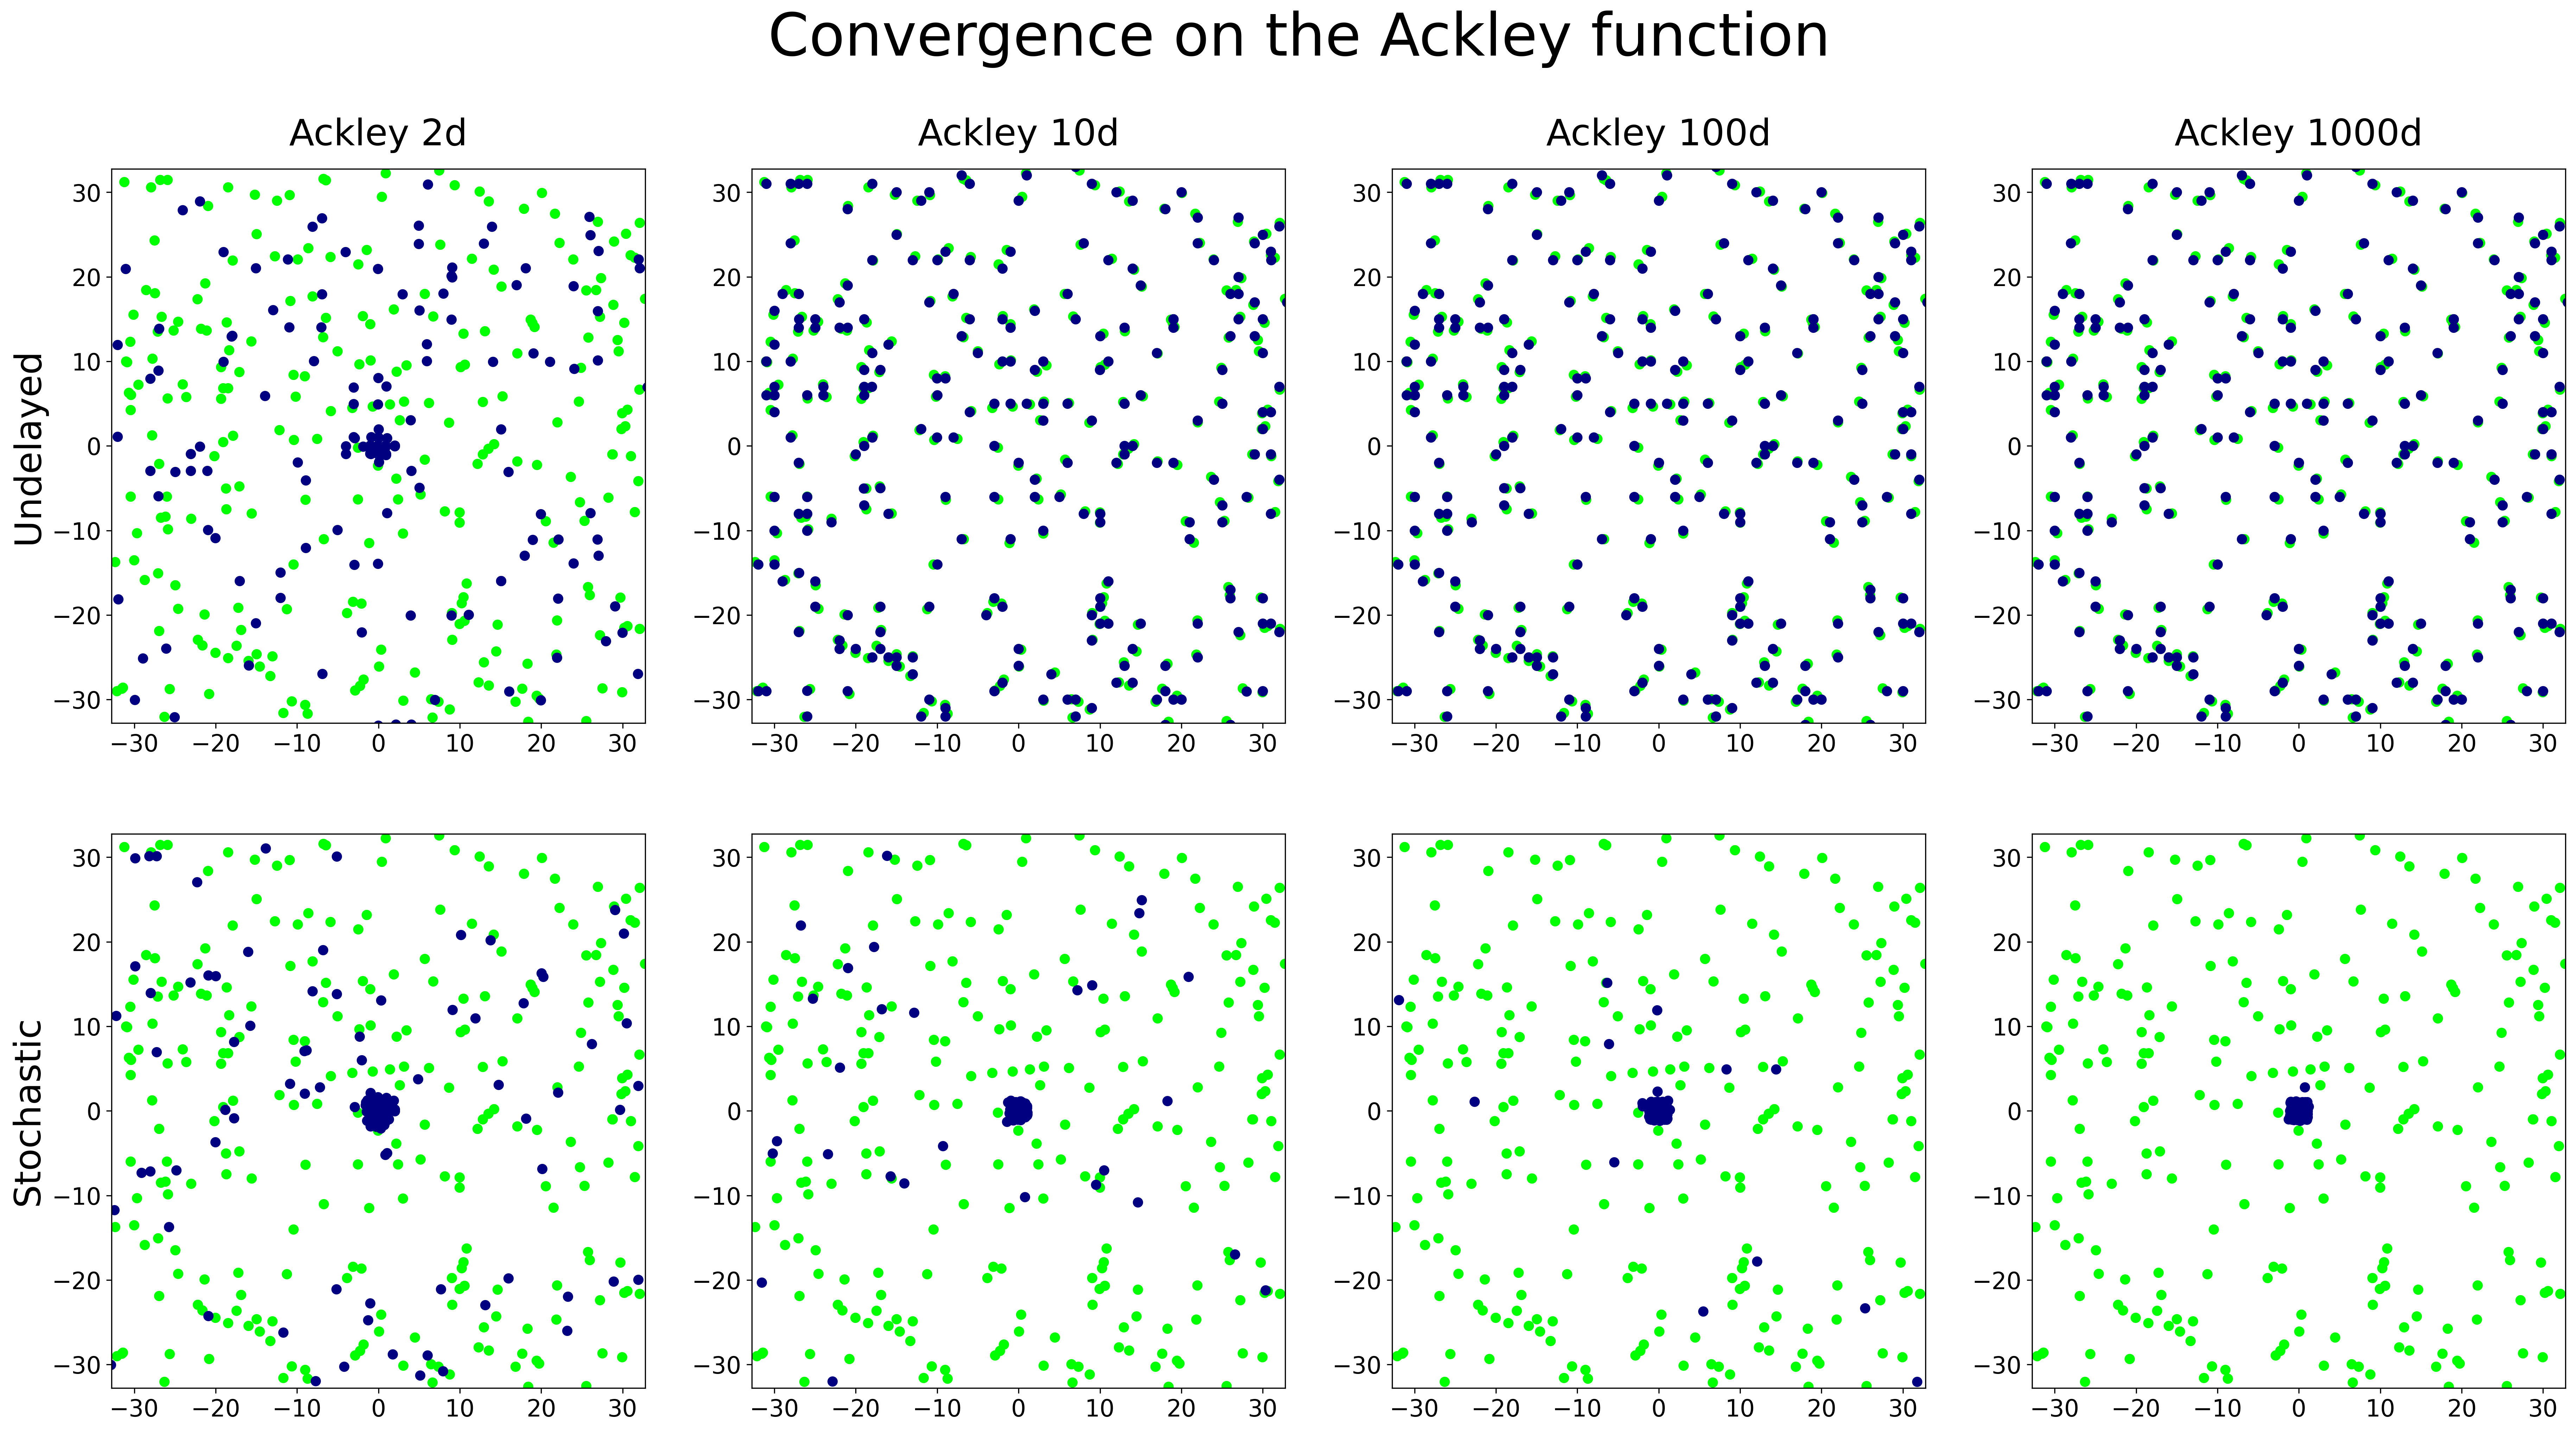

In [6]:
plot_conv_all(loss_name, file_tags, labels)
plt.savefig(f"Plots/{loss_name}_conv.png")
plt.show()

## Rastrigin

In [7]:
loss_name = "Rastrigin"
file_tags = ["optimal_undel", "optimal_stochL1"]
labels = ["Undelayed", "Stochastic"]

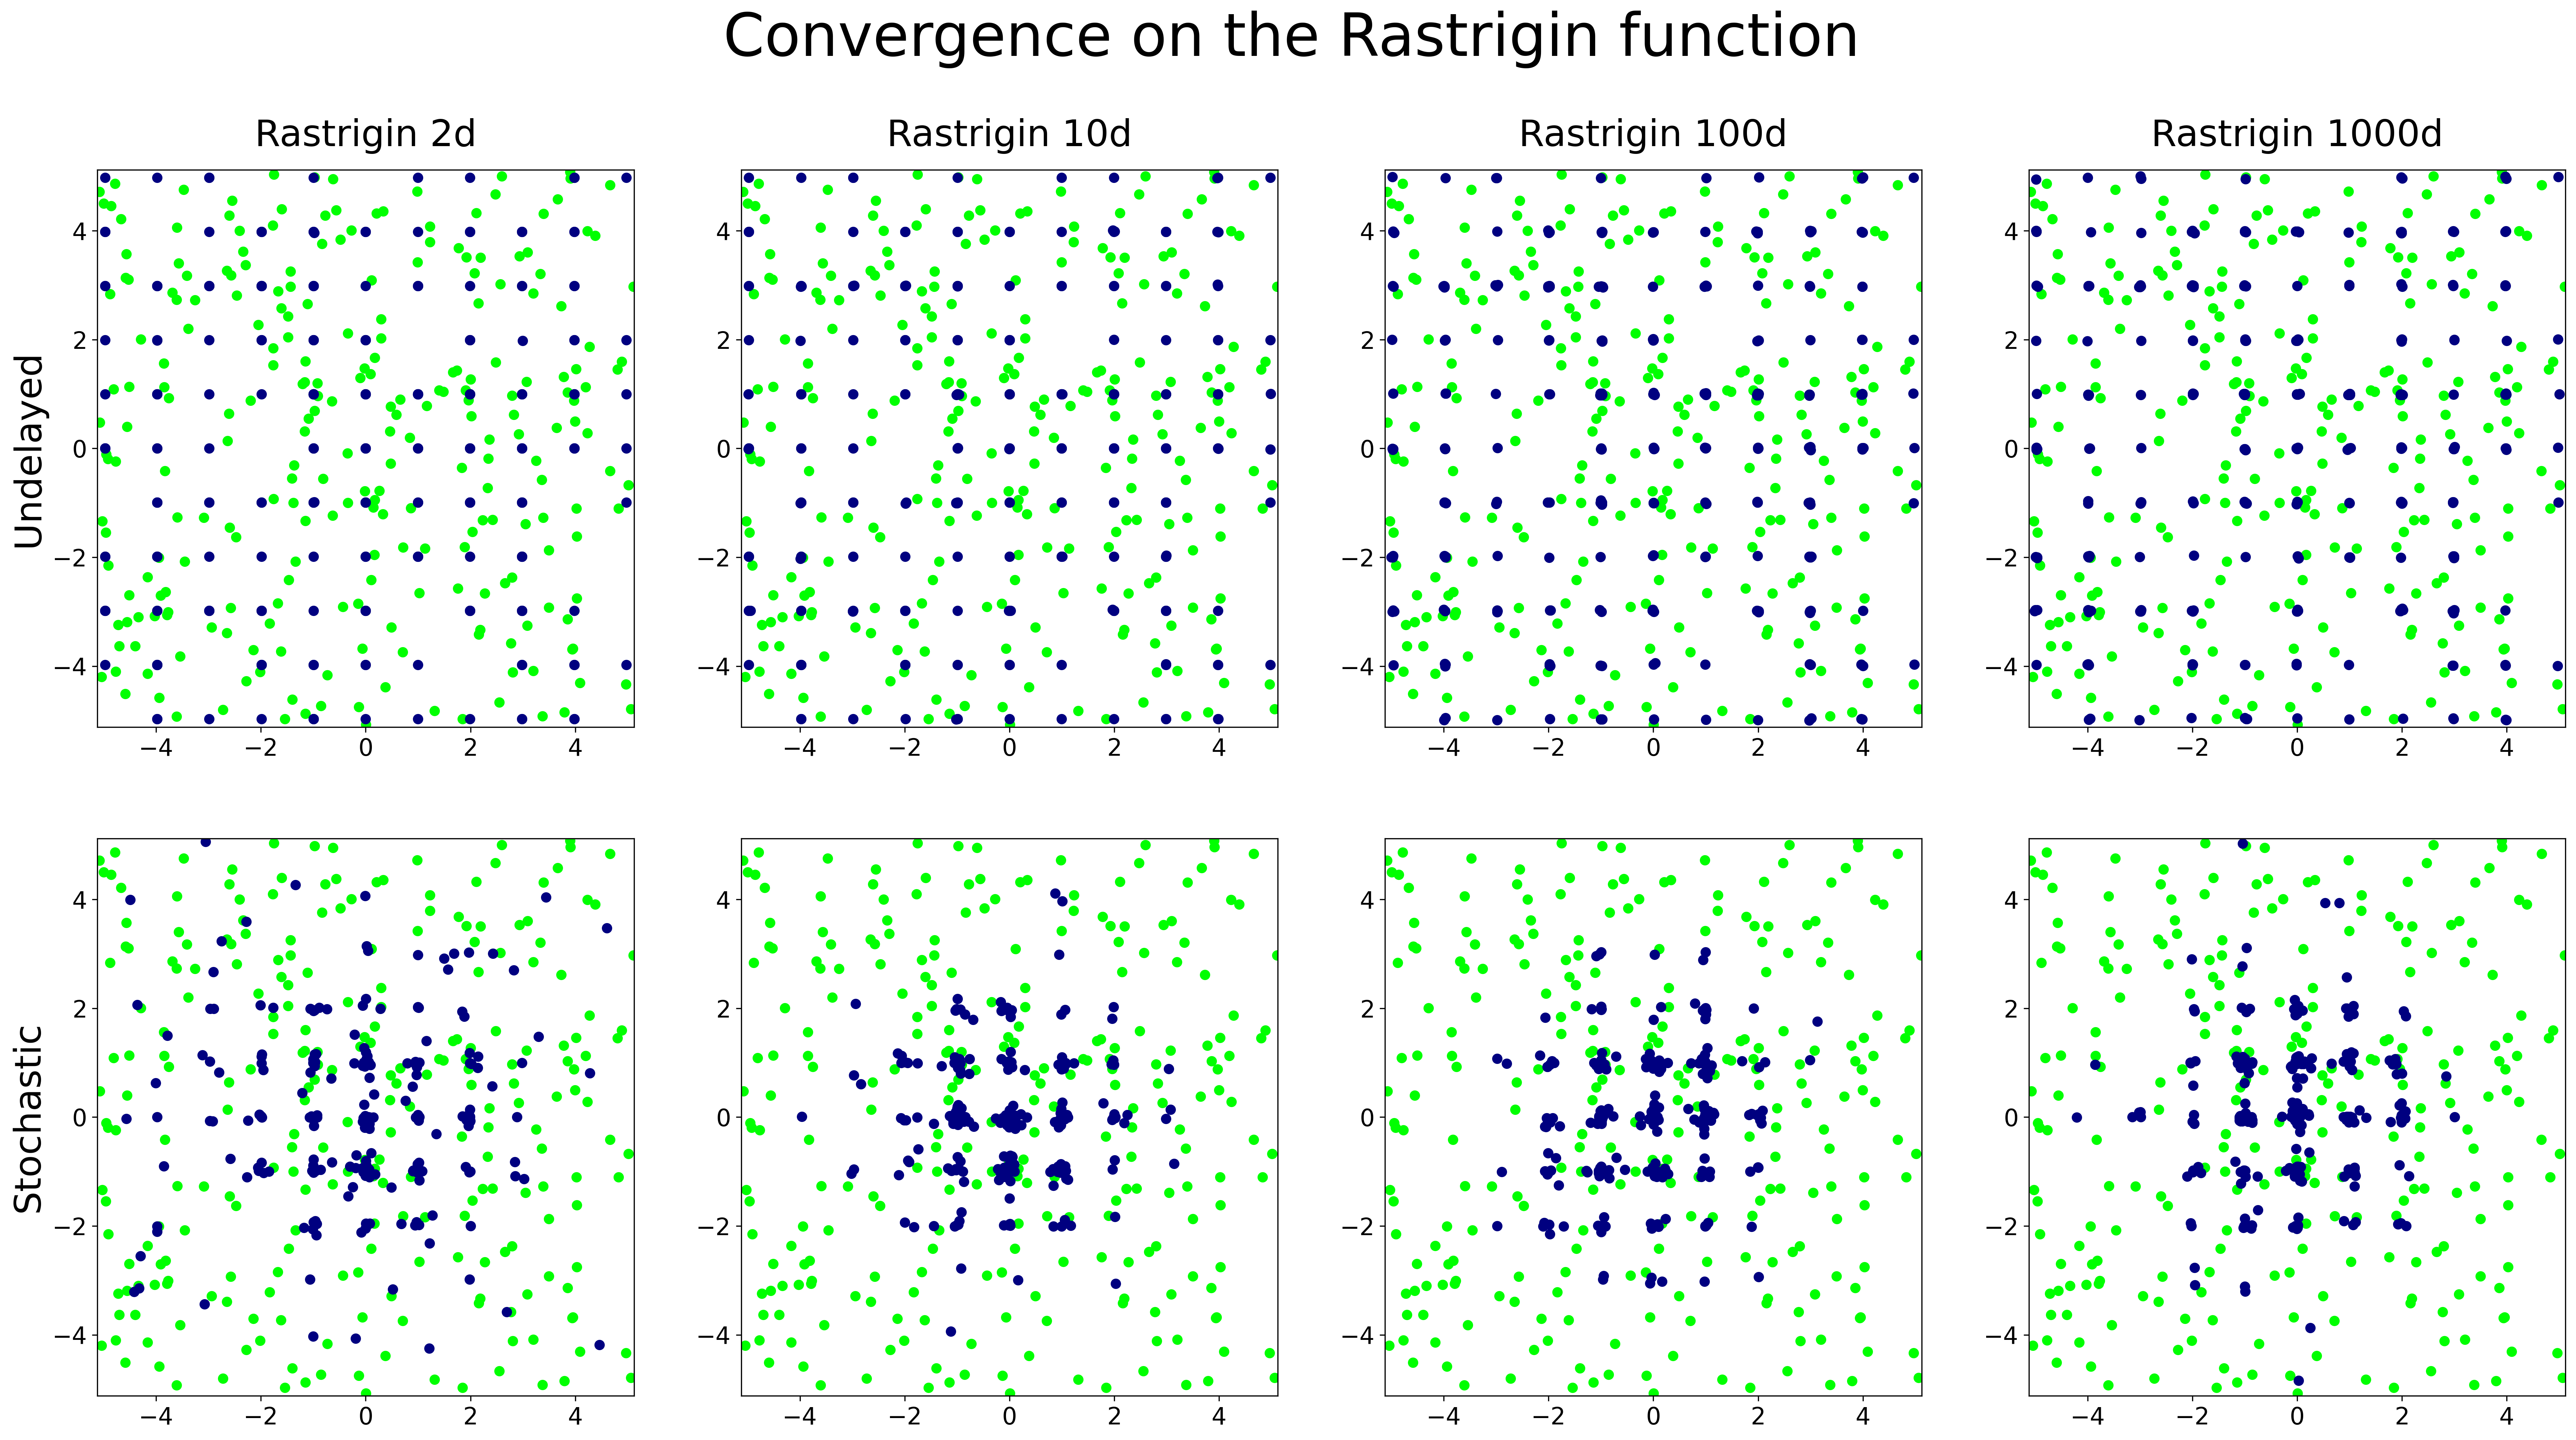

In [8]:
plot_conv_all(loss_name, file_tags, labels)
plt.savefig(f"Plots/{loss_name}_conv.png")
plt.show()

## Rosenbrock

In [9]:
loss_name = "Rosenbrock"
file_tags = ["optimal_undel", "optimal_stochL1"]
labels = ["Undelayed", "Stochastic"]

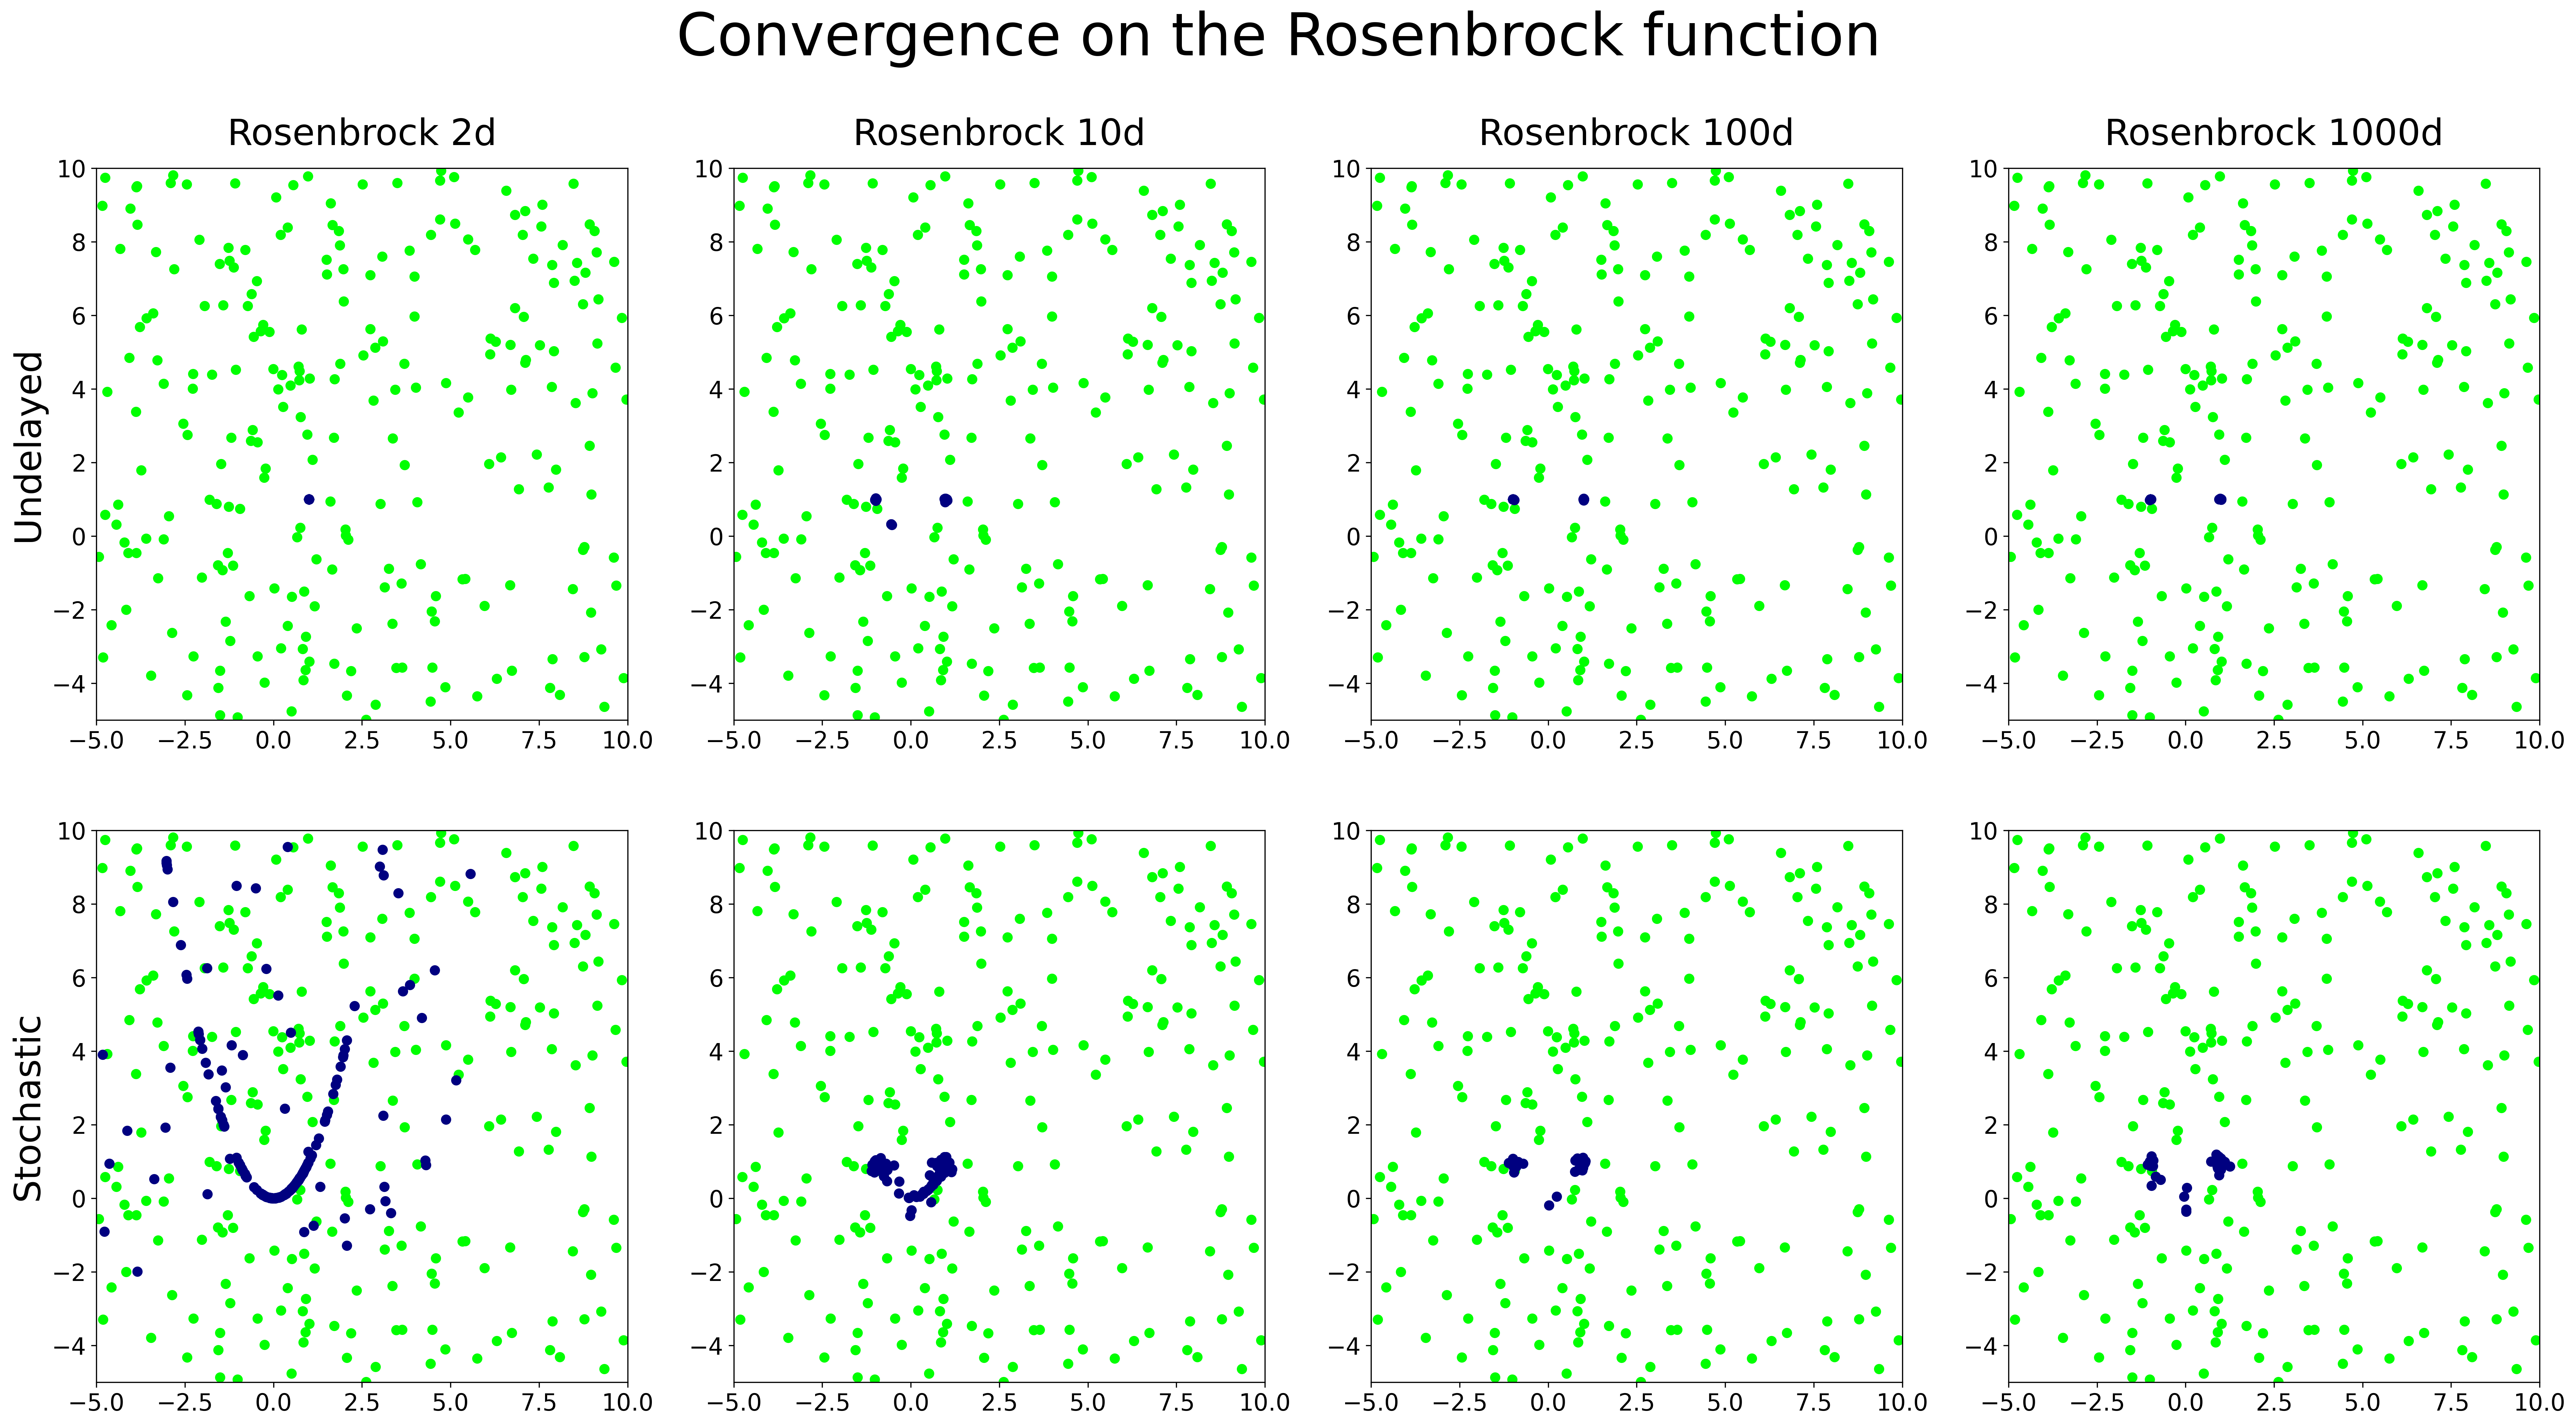

In [10]:
plot_conv_all(loss_name, file_tags, labels)
plt.savefig(f"Plots/{loss_name}_conv.png")
plt.show()

## Zakharov

In [11]:
loss_name = "Zakharov"
file_tags = ["optimal_undel", "optimal_stochL1"]
labels = ["Undelayed", "Stochastic"]

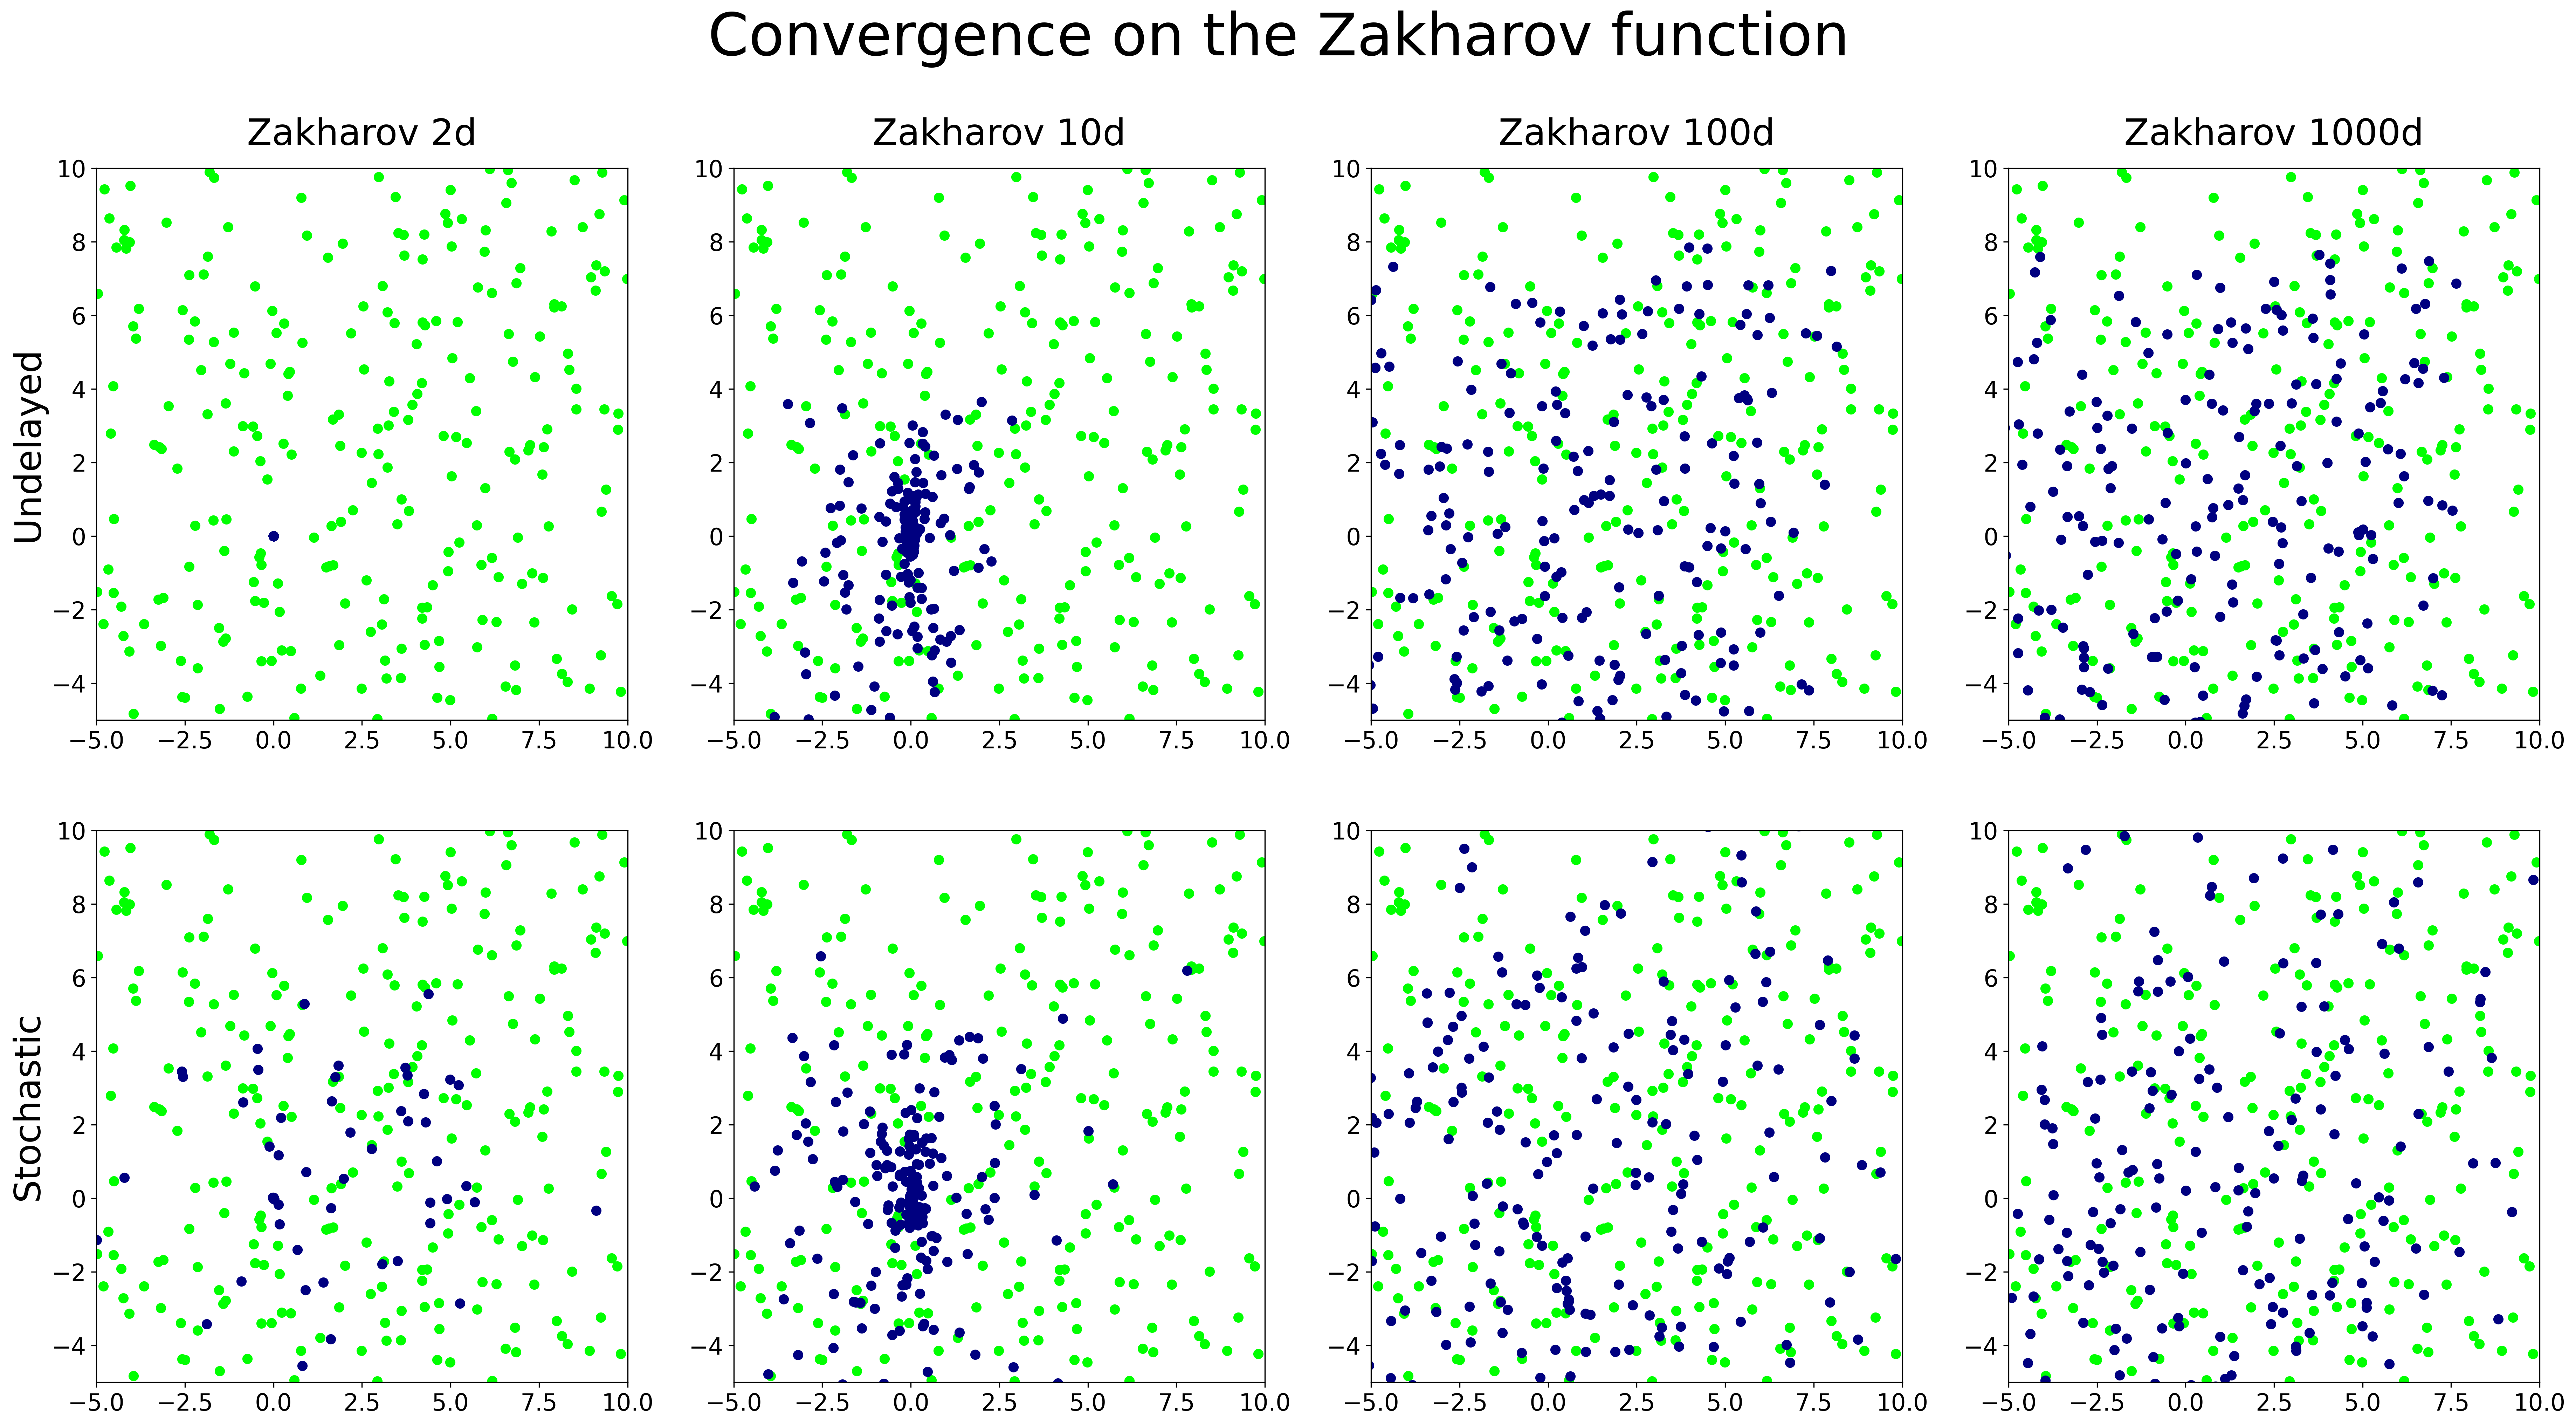

In [12]:
plot_conv_all(loss_name, file_tags, labels)
plt.savefig(f"Plots/{loss_name}_conv.png")
plt.show()